In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

In [6]:
# Loading the Excel file and selecting the correct sheet
file = "IncomeDistribution2010-19.xlsx"
sheet = "T3_1a"

# Read the data, skipping the first two rows (which are empty)
data = pd.read_excel(file, sheet_name=sheet, header=3)
data.head()

,Percentile point\nTotal income before tax,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,1,6730,7740,8370,9710,10300,10800,11200,11700,12100
1,2,7000,8000,8670,10000,10600,11100,11500,12000,12300
2,3,7260,8280,8970,10300,10800,11300,11700,12300,12600
3,4,7550,8560,9260,10600,11000,11500,11900,12500,12800
4,5,7830,8840,9570,10800,11200,11700,12200,12800,13100


In [7]:
incomes_2016_17 = [x for x in data['2016-17'].dropna()]
percentiles = list(range(1, 100))  # Percentiles 1-99

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'percentile': percentiles,
    'income': incomes_2016_17
})

# Filter data for incomes >= £15,000 (given threshold xm)
filtered_data = df[df['income'] >= 15000]

# Calculate the maximum likelihood estimate for lambda
# Using the formula: lambda_ML = n / sum(ln(x_i/x_m))
n = len(filtered_data)
x_m = 15000
log_ratio_sum = np.sum(np.log(filtered_data['income'] / x_m))
lambda_ML = n / log_ratio_sum

print(f"Number of data points used: {n}")
print(f"Maximum Likelihood Estimate for lambda: {lambda_ML:.4f}")

Number of data points used: 82
Maximum Likelihood Estimate for lambda: 1.4829


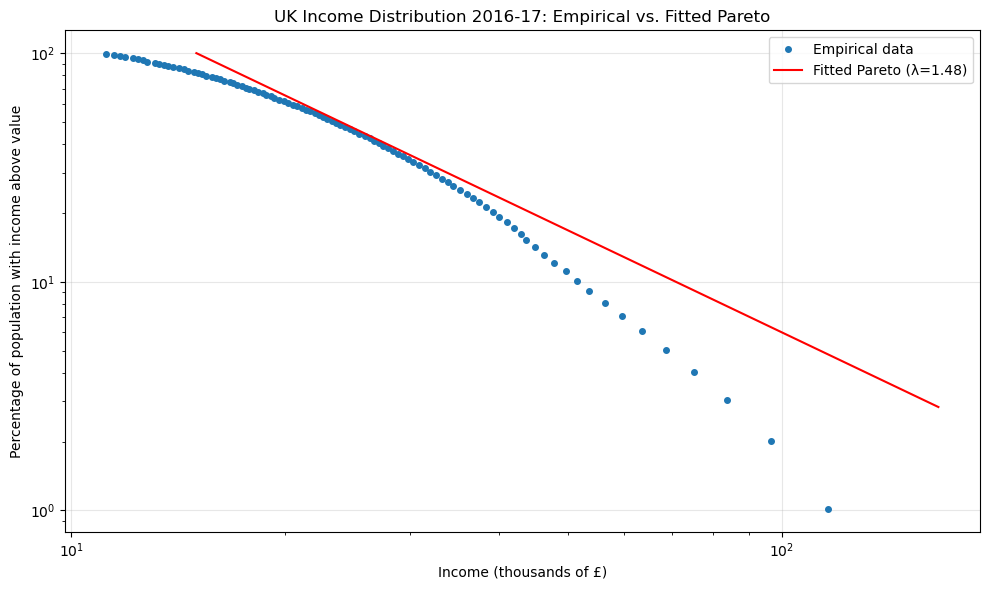

In [8]:
# Creating a plot to visualize the fit
plt.figure(figsize=(10, 6))

# Plot empirical data as percentage above vs. income
x_sorted = np.sort(df['income'])
y_sorted = 100 * (1 - np.arange(1, len(x_sorted) + 1) / len(x_sorted))

plt.plot(x_sorted / 1000, y_sorted, 'o', markersize=4, label='Empirical data')

# Generate Pareto distribution with MLE parameter
x_range = np.linspace(x_m, max(df['income']), 1000)
pareto_cdf = 100 * ((x_m / x_range) ** lambda_ML)  # Percentage above threshold
plt.plot(x_range / 1000, pareto_cdf, 'r-', label=f'Fitted Pareto (λ={lambda_ML:.2f})')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Income (thousands of £)')
plt.ylabel('Percentage of population with income above value')
plt.title('UK Income Distribution 2016-17: Empirical vs. Fitted Pareto')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('income_pareto_fit_2016_17.png', dpi=300)
plt.show()